# Execute the code below

In [2]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv"
df_weather = pd.read_csv(link)

In [3]:
#columns = colonnes
#index = lignes
#values = valeurs
#aggfunc = fonction d'agrégation

# You have now a DataFrame with lots of weather data

In [4]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# PIVOT TABLE

## It's like in Excel, but with Pandas

There are 2 syntaxes, choose your preferred :
- As a method : YOUR_DATAFRAME.pivot_table()
- As a function : pd.crosstab()

In [5]:
# Example
df_weather.pivot_table(values = 'MAX_TEMPERATURE_C', index = 'MONTH', aggfunc = 'mean')

,MAX_TEMPERATURE_C
MONTH,
1,8.161290
2,12.750000
3,13.064516
4,14.900000
5,16.870968
6,22.166667
7,26.806452
8,25.290323
9,22.533333


## Create a Pivot table with :
- Months on rows
- the maximum of Max Temperature on values
- Opinion on columns

In [6]:
# Hop !
pivot_table1 = df_weather.pivot_table(values = "MAX_TEMPERATURE_C", index = "MONTH", columns = "OPINION")
print(pivot_table1)

OPINION        bad       good  not good not bad   very bad  very good
MONTH                                                                
1        10.333333        NaN               NaN   7.640000        NaN
2        11.333333  19.000000         14.777778   9.900000        NaN
3        11.777778  18.500000         14.363636  11.555556        NaN
4        14.000000  20.285714         15.000000  10.875000        NaN
5        16.111111  20.428571         16.416667  12.666667        NaN
6        18.250000  23.800000         21.222222  15.000000       29.0
7        26.000000  26.800000         27.000000  22.000000       30.0
8        21.600000  26.933333         24.300000        NaN       29.0
9        19.428571  24.150000         18.500000  20.000000        NaN
10       16.473684  19.250000         17.285714  14.000000        NaN
11       12.666667        NaN         13.000000  10.062500        NaN
12       12.000000        NaN         13.000000  10.173913        NaN


## Pivot table with :
- Days on rows
- Precipitation on values
- Months on columns


In [7]:
# Hop !
pivot_table2 = df_weather.pivot_table(values = "PRECIP_TOTAL_DAY_MM", index = "DAY", columns = "MONTH")
print(pivot_table2)

MONTH    1     2     3     4     5     6     7    8     9     10    11    12
DAY                                                                         
1       0.2   7.3   0.0   2.0   6.0   0.0   1.0  0.0   0.0   5.7  14.5   0.0
2       0.0   1.0   4.9   1.8   0.4   0.0   0.0  0.0   0.0   0.2  11.0   0.0
3       0.0   0.0   5.4   5.2   0.5   0.5   0.0  0.0   0.0   0.3  30.0   0.0
4       0.0  18.6  11.1   1.1   0.6   6.3   0.0  0.0   0.3   1.1   4.2   0.0
5       0.0   0.8   1.1  10.1   0.3   1.5   0.6  0.1   0.0   0.4   8.0   0.0
6       0.0   9.4  47.6   6.1   0.0   2.7   7.5  4.4   0.0   1.5   1.1   0.3
7       0.0   4.0   3.4   3.0   1.2  27.3   1.7  0.1   0.2   4.3  11.4   0.4
8       0.2   1.6   0.2   1.6  17.8   3.4   0.0  0.0   0.0   3.9   3.2   9.1
9       0.0   6.3   5.3   0.8   4.4   4.0   0.0  5.5   8.4   2.6  10.1   0.6
10      0.1  29.1   1.2   1.9   1.7   2.7   0.0  0.2   7.6   0.5   2.1   0.9
11      0.2   0.1   0.1   0.1   2.0   3.4   0.0  1.1   0.0   0.0   3.8   5.9

## Pivot table with :
- Months on rows
- the sum of Precipitations on values

**Then display it as a column chart.** (optionnal)

In [8]:
# Hop !
pivot_table3 = df_weather.pivot_table(values = "PRECIP_TOTAL_DAY_MM", index = "MONTH", aggfunc = sum)
print(pivot_table3)

       PRECIP_TOTAL_DAY_MM
MONTH                     
1                     58.2
2                     82.5
3                    103.4
4                     99.7
5                     71.6
6                     77.2
7                     40.6
8                     33.2
9                     60.1
10                    98.1
11                   198.6
12                   177.6


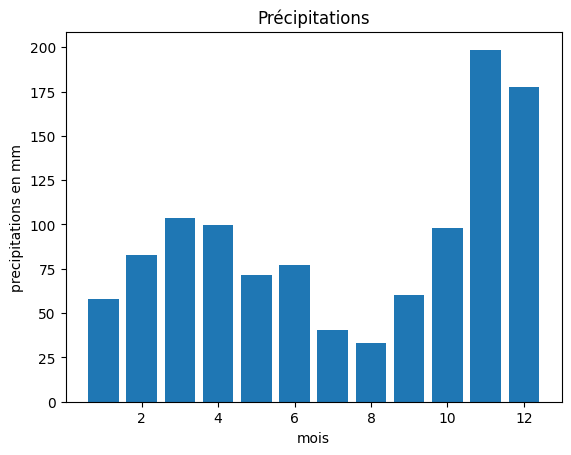

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(pivot_table3.index, pivot_table3.sum(axis = 1))
ax.set_title("Précipitations")
ax.set_xlabel("mois")
ax.set_ylabel("precipitations en mm")

plt.show()


## Pivot table with :
- Months on rows
- the average of Max Temperature on a first column of values
- the average of Sunhours on a second column of values

In [10]:
# Hop !
pivot_table4 = df_weather.pivot_table(index = "MONTH", aggfunc = {"MAX_TEMPERATURE_C" : np.mean, "SUNHOUR": np.mean})
print(pivot_table4)

       MAX_TEMPERATURE_C    SUNHOUR
MONTH                              
1               8.161290   5.709677
2              12.750000   8.346429
3              13.064516   9.077419
4              14.900000   9.533333
5              16.870968  11.809677
6              22.166667  14.170000
7              26.806452  14.141935
8              25.290323  11.135484
9              22.533333   9.683333
10             16.935484   7.151613
11             11.300000   5.063333
12             10.677419   5.912903


# Chart
Using your favorite library (MatPlotLib, Seaborn, Plotly or what you want), draw a chart from the previous pivot table with :
- Temperature in a blue column chart
- Sunhours in a red line plot

Tip : Once your pivot table created, you can help yourself with the `.reset_index()`  method.

In [11]:
# Your code here



NameError: name 'make_subplots' is not defined